In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## z-scores for SNV density, for various kmer sizes, and various train sets, and overlap with various features (enhancers, exons, etc) 

First Chen et al preprint is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022

Second Chen et al preprint is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen-et-al-2022-second-preprint

I used the following notebook to merge the old chen zscores (from first preprint) with the mchale zscores computed on the old Chen windows:
```
experiments/germline-model/chen-et-al-2022/merge_chen_zscores_with_mchale_zscores.Nonly.ipynb
```

I used the following script to compute the number of bps of each (old) Chen window that is covered by each feature:
```
experiments/germline-model/chen-et-al-2022/add-overlapAmounts.sh
```

writing the data to
```
${CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.kmerSizes.trainSets.overlapAmounts.bed
```


In [2]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

In [5]:
import pandas as pd 

pd.set_option('display.max_rows', 30)

def get_chen_mchale_features():
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.kmerSizes.trainSets.overlapAmounts.bed'
    df = pd.read_csv(filename, sep='\t')
    df = df.drop(columns = ['chen_zscore'])
    return df

chen_mchale_zscores_features = get_chen_mchale_features()
chen_mchale_zscores_features

,chromosome,start,end,N_observed,N_bar_3_noncoding,N_bar_3_coding,N_bar_3_chenWindows,N_bar_5_noncoding,N_bar_5_coding,N_bar_5_chenWindows,N_bar_7_noncoding,N_bar_7_coding,N_bar_7_chenWindows,feature,feature_chromosome,feature_start,feature_end,window_feature_overlap_bps
0,chr1,1432000,1433000,260,-0.247615,2.264194,0.118933,-0.339806,1.967525,0.075982,-0.372778,1.786749,0.081009,enhancer,chr1,1428218,1438733,1000
1,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,enhancer,chr1,1428218,1438733,1000
2,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,merged_exon,chr1,1434861,1435146,146
3,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,merged_exon,chr1,1435523,1435821,298
4,chr1,1449000,1450000,225,0.258359,2.316462,0.600034,0.330975,2.319833,0.684473,0.139977,2.101117,0.520413,merged_exon,chr1,1449689,1450758,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001165,chr22,50227000,50228000,283,1.220947,3.869722,1.602955,1.340543,3.779904,1.761348,1.371285,3.723743,1.823687,merged_exon,chr22,50227907,50228028,93
2001166,chr22,50228000,50229000,241,-0.317039,1.935872,0.024522,-0.348897,1.724601,0.033374,-0.330285,1.729511,0.101667,enhancer,chr22,50228803,50228983,180
2001167,chr22,50228000,50229000,241,-0.317039,1.935872,0.024522,-0.348897,1.724601,0.033374,-0.330285,1.729511,0.101667,merged_exon,chr22,50227907,50228028,28
2001168,chr22,50229000,50230000,231,-1.323602,1.031312,-0.978026,-1.250236,0.939094,-0.903616,-1.225998,0.927144,-0.855868,merged_exon,chr22,50229404,50229577,173


## Create single record for each window, with overlap amounts for each feature type 

The code in this section is identical to the corresponding code in `Fig_2a.ipynb`. 

In [6]:
chen_mchale_zscores_features = chen_mchale_zscores_features.drop(['feature_chromosome', 'feature_start', 'feature_end'], axis=1)
chen_mchale_zscores_features

,chromosome,start,end,N_observed,N_bar_3_noncoding,N_bar_3_coding,N_bar_3_chenWindows,N_bar_5_noncoding,N_bar_5_coding,N_bar_5_chenWindows,N_bar_7_noncoding,N_bar_7_coding,N_bar_7_chenWindows,feature,window_feature_overlap_bps
0,chr1,1432000,1433000,260,-0.247615,2.264194,0.118933,-0.339806,1.967525,0.075982,-0.372778,1.786749,0.081009,enhancer,1000
1,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,enhancer,1000
2,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,merged_exon,146
3,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,merged_exon,298
4,chr1,1449000,1450000,225,0.258359,2.316462,0.600034,0.330975,2.319833,0.684473,0.139977,2.101117,0.520413,merged_exon,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001165,chr22,50227000,50228000,283,1.220947,3.869722,1.602955,1.340543,3.779904,1.761348,1.371285,3.723743,1.823687,merged_exon,93
2001166,chr22,50228000,50229000,241,-0.317039,1.935872,0.024522,-0.348897,1.724601,0.033374,-0.330285,1.729511,0.101667,enhancer,180
2001167,chr22,50228000,50229000,241,-0.317039,1.935872,0.024522,-0.348897,1.724601,0.033374,-0.330285,1.729511,0.101667,merged_exon,28
2001168,chr22,50229000,50230000,231,-1.323602,1.031312,-0.978026,-1.250236,0.939094,-0.903616,-1.225998,0.927144,-0.855868,merged_exon,173


In [7]:
columns_to_group_by = [column for column in chen_mchale_zscores_features.columns if column != 'window_feature_overlap_bps']
columns_to_group_by

['chromosome',
 'start',
 'end',
 'N_observed',
 'N_bar_3_noncoding',
 'N_bar_3_coding',
 'N_bar_3_chenWindows',
 'N_bar_5_noncoding',
 'N_bar_5_coding',
 'N_bar_5_chenWindows',
 'N_bar_7_noncoding',
 'N_bar_7_coding',
 'N_bar_7_chenWindows',
 'feature']

In [8]:
chen_mchale_zscores_features = ( 
    chen_mchale_zscores_features
    .groupby(columns_to_group_by)
    .agg({'window_feature_overlap_bps': 'sum'})
)
chen_mchale_zscores_features

window_feature_overlap_bps
chromosome start     end       N_observed N_bar_3_noncoding N_bar_3_coding N_bar_3_chenWindows N_bar_5_noncoding N_bar_5_coding N_bar_5_chenWindows N_bar_7_noncoding N_bar_7_coding N_bar_7_chenWindows feature                                
chr1       1432000   1433000   260        -0.247615          2.264194       0.118933           -0.339806          1.967525       0.075982           -0.372778          1.786749       0.081009           enhancer                           1000
           1435000   1436000   275        -7.547130         -2.542472      -6.944479           -6.810107         -2.075201      -6.071172           -6.280673         -1.910324      -5.310077           enhancer                           1000
                                                                                                                                                                                                         merged_exon                         444
           1449000   1450000   225         0.258359          2.316462       0.600034            0.330975          2.319833       0.684473            0.139977          2.101117       0.520413           merged_exon                         311
           1450000   1451000   313         2.197534          5.178077       2.607210            2.480911          5.214801       2.933478            2.524948          5.129449       2.997041           merged_exon                         758
...                                                                                                                                                                                                                                          ...
chr9       137282000 137283000 211        -1.919711          0.252487      -1.596114           -1.783906          0.278109      -1.452829           -1.612483          0.278168      -1.309697           enhancer                            572
                                                                                                                                                                                                         merged_exon                         641
           137290000 137291000 224        -0.682673          1.438412      -0.362059           -0.522518          1.394931      -0.220129           -0.215971          1.436882       0.036259           .                                     0
           137294000 137295000 182        -5.749158         -3.146285      -5.400950           -5.529565         -3.076692      -5.160589           -5.354983         -2.987383      -4.948494           enhancer                           1000
                                                                                                                                                                                                         merged_exon                        1000

[1917155 rows x 1 columns]

In [9]:
pivot_index = [column for column in columns_to_group_by if column != 'feature']
pivot_index 

['chromosome',
 'start',
 'end',
 'N_observed',
 'N_bar_3_noncoding',
 'N_bar_3_coding',
 'N_bar_3_chenWindows',
 'N_bar_5_noncoding',
 'N_bar_5_coding',
 'N_bar_5_chenWindows',
 'N_bar_7_noncoding',
 'N_bar_7_coding',
 'N_bar_7_chenWindows']

In [10]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
# pivoting is possible in SQL too, but it is clunky: https://www.databricks.com/blog/2018/11/01/sql-pivot-converting-rows-to-columns.html
chen_mchale_zscores_features = (
    chen_mchale_zscores_features
    .reset_index()
    .pivot(
        index = pivot_index, 
        columns = "feature", 
        values = "window_feature_overlap_bps"
    )
    .drop(['.'], axis=1)
    .add_suffix(' overlap')
    .reset_index()
)
chen_mchale_zscores_features.columns.name = None
chen_mchale_zscores_features

,chromosome,start,end,N_observed,N_bar_3_noncoding,N_bar_3_coding,N_bar_3_chenWindows,N_bar_5_noncoding,N_bar_5_coding,N_bar_5_chenWindows,N_bar_7_noncoding,N_bar_7_coding,N_bar_7_chenWindows,enhancer overlap,merged_encode_exclude_region overlap,merged_exon overlap,merged_gap overlap,uncovered_region overlap
0,chr1,1432000,1433000,260,-0.247615,2.264194,0.118933,-0.339806,1.967525,0.075982,-0.372778,1.786749,0.081009,1000.0,NaN,NaN,NaN,NaN
1,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,1000.0,NaN,444.0,NaN,NaN
2,chr1,1449000,1450000,225,0.258359,2.316462,0.600034,0.330975,2.319833,0.684473,0.139977,2.101117,0.520413,NaN,NaN,311.0,NaN,NaN
3,chr1,1450000,1451000,313,2.197534,5.178077,2.607210,2.480911,5.214801,2.933478,2.524948,5.129449,2.997041,NaN,NaN,758.0,NaN,NaN
4,chr1,1451000,1452000,293,2.367303,5.056714,2.758334,2.725116,5.216863,3.145152,2.951595,5.311666,3.382963,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,210,-3.445370,-0.925010,-3.097011,-3.228932,-0.881123,-2.872507,-3.060479,-0.742758,-2.657076,1000.0,NaN,NaN,NaN,NaN
1796996,chr9,137275000,137276000,296,1.921453,4.684512,2.318246,1.974808,4.515817,2.405245,1.990841,4.391365,2.417947,712.0,NaN,NaN,NaN,NaN
1796997,chr9,137282000,137283000,211,-1.919711,0.252487,-1.596114,-1.783906,0.278109,-1.452829,-1.612483,0.278168,-1.309697,572.0,NaN,641.0,NaN,NaN
1796998,chr9,137290000,137291000,224,-0.682673,1.438412,-0.362059,-0.522518,1.394931,-0.220129,-0.215971,1.436882,0.036259,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Note: the groupby followed by pivot strategy, implemented above,
# could be achieved in one step using pivot tables: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivoting-with-single-aggregations

## Throw out non-trustworthy windows, and classify the remainder according to whether they appreciably overlap enhancers or exons 

The code in this section is identical to the corresponding code in `Fig_2a.ipynb`.

In [11]:
def classify(df, feature, min_overlap): 
    def overlaps_enhancer(overlap): 
        if pd.isna(overlap): 
            return False
        if overlap > min_overlap: 
            return True 
        return 'ambiguous'

    df[f'window overlaps {feature}'] = df[f'{feature} overlap'].apply(overlaps_enhancer)
    return df
    
def classify_all(df): 
    for feature, min_overlap in [
        ('enhancer', 10),
        ('merged_encode_exclude_region', 0),
        ('merged_exon', 5),
        ('merged_gap', 0),
        ('uncovered_region', 0),
    ]:
        df = classify(df, feature, min_overlap)
    return df 

pd.set_option('display.max_columns', 40)

chen_mchale_zscores_features = classify_all(chen_mchale_zscores_features)
chen_mchale_zscores_features 

,chromosome,start,end,N_observed,N_bar_3_noncoding,N_bar_3_coding,N_bar_3_chenWindows,N_bar_5_noncoding,N_bar_5_coding,N_bar_5_chenWindows,N_bar_7_noncoding,N_bar_7_coding,N_bar_7_chenWindows,enhancer overlap,merged_encode_exclude_region overlap,merged_exon overlap,merged_gap overlap,uncovered_region overlap,window overlaps enhancer,window overlaps merged_encode_exclude_region,window overlaps merged_exon,window overlaps merged_gap,window overlaps uncovered_region
0,chr1,1432000,1433000,260,-0.247615,2.264194,0.118933,-0.339806,1.967525,0.075982,-0.372778,1.786749,0.081009,1000.0,NaN,NaN,NaN,NaN,True,False,False,False,False
1,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,1000.0,NaN,444.0,NaN,NaN,True,False,True,False,False
2,chr1,1449000,1450000,225,0.258359,2.316462,0.600034,0.330975,2.319833,0.684473,0.139977,2.101117,0.520413,NaN,NaN,311.0,NaN,NaN,False,False,True,False,False
3,chr1,1450000,1451000,313,2.197534,5.178077,2.607210,2.480911,5.214801,2.933478,2.524948,5.129449,2.997041,NaN,NaN,758.0,NaN,NaN,False,False,True,False,False
4,chr1,1451000,1452000,293,2.367303,5.056714,2.758334,2.725116,5.216863,3.145152,2.951595,5.311666,3.382963,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,210,-3.445370,-0.925010,-3.097011,-3.228932,-0.881123,-2.872507,-3.060479,-0.742758,-2.657076,1000.0,NaN,NaN,NaN,NaN,True,False,False,False,False
1796996,chr9,137275000,137276000,296,1.921453,4.684512,2.318246,1.974808,4.515817,2.405245,1.990841,4.391365,2.417947,712.0,NaN,NaN,NaN,NaN,True,False,False,False,False
1796997,chr9,137282000,137283000,211,-1.919711,0.252487,-1.596114,-1.783906,0.278109,-1.452829,-1.612483,0.278168,-1.309697,572.0,NaN,641.0,NaN,NaN,True,False,True,False,False
1796998,chr9,137290000,137291000,224,-0.682673,1.438412,-0.362059,-0.522518,1.394931,-0.220129,-0.215971,1.436882,0.036259,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False


In [12]:
def throw_out_untrustworthy(df): 
    throw_out = df[[
        'window overlaps merged_encode_exclude_region',
        'window overlaps merged_gap',
        'window overlaps uncovered_region'
    ]].any(axis='columns')
    keep = ~throw_out
    return (
        df[keep]
        .drop([
            'merged_encode_exclude_region overlap',
            'merged_gap overlap',
            'uncovered_region overlap',
            'window overlaps merged_encode_exclude_region',
            'window overlaps merged_gap',
            'window overlaps uncovered_region'
        ], axis=1)
    )

def throw_out_ambiguous(df):
    throw_out = (
        df[[
            'window overlaps enhancer',
            'window overlaps merged_exon',
        ]]
        .isin(['ambiguous'])
        .any(axis=1)
    )
    keep = ~throw_out
    return (
        df[keep]
        .astype({
            'window overlaps enhancer': bool,
            'window overlaps merged_exon': bool,
        })
    )

def filter_windows(df): 
    df = throw_out_untrustworthy(df)
    df = throw_out_ambiguous(df)
    return df 

chen_mchale_zscores_features = filter_windows(chen_mchale_zscores_features)
chen_mchale_zscores_features

,chromosome,start,end,N_observed,N_bar_3_noncoding,N_bar_3_coding,N_bar_3_chenWindows,N_bar_5_noncoding,N_bar_5_coding,N_bar_5_chenWindows,N_bar_7_noncoding,N_bar_7_coding,N_bar_7_chenWindows,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon
0,chr1,1432000,1433000,260,-0.247615,2.264194,0.118933,-0.339806,1.967525,0.075982,-0.372778,1.786749,0.081009,1000.0,NaN,True,False
1,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,1000.0,444.0,True,True
2,chr1,1449000,1450000,225,0.258359,2.316462,0.600034,0.330975,2.319833,0.684473,0.139977,2.101117,0.520413,NaN,311.0,False,True
3,chr1,1450000,1451000,313,2.197534,5.178077,2.607210,2.480911,5.214801,2.933478,2.524948,5.129449,2.997041,NaN,758.0,False,True
4,chr1,1451000,1452000,293,2.367303,5.056714,2.758334,2.725116,5.216863,3.145152,2.951595,5.311666,3.382963,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,210,-3.445370,-0.925010,-3.097011,-3.228932,-0.881123,-2.872507,-3.060479,-0.742758,-2.657076,1000.0,NaN,True,False
1796996,chr9,137275000,137276000,296,1.921453,4.684512,2.318246,1.974808,4.515817,2.405245,1.990841,4.391365,2.417947,712.0,NaN,True,False
1796997,chr9,137282000,137283000,211,-1.919711,0.252487,-1.596114,-1.783906,0.278109,-1.452829,-1.612483,0.278168,-1.309697,572.0,641.0,True,True
1796998,chr9,137290000,137291000,224,-0.682673,1.438412,-0.362059,-0.522518,1.394931,-0.220129,-0.215971,1.436882,0.036259,NaN,NaN,False,False


In [13]:
def joint_classify(df): 
    new_column = 'window overlaps (enhancer, merged_exon)'
    df[new_column] = list(zip(df['window overlaps enhancer'], df['window overlaps merged_exon'])) 

    from pandas.api.types import CategoricalDtype    
    category_type = CategoricalDtype(categories=[(False, False), (True, False), (False, True), (True, True)], ordered=True)
    df[new_column] = df[new_column].astype(category_type)
    
#     df = df.drop(['window overlaps enhancer', 'window overlaps merged_exon'], axis=1)

    return df

chen_mchale_zscores_features = joint_classify(chen_mchale_zscores_features)
chen_mchale_zscores_features

,chromosome,start,end,N_observed,N_bar_3_noncoding,N_bar_3_coding,N_bar_3_chenWindows,N_bar_5_noncoding,N_bar_5_coding,N_bar_5_chenWindows,N_bar_7_noncoding,N_bar_7_coding,N_bar_7_chenWindows,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon,"window overlaps (enhancer, merged_exon)"
0,chr1,1432000,1433000,260,-0.247615,2.264194,0.118933,-0.339806,1.967525,0.075982,-0.372778,1.786749,0.081009,1000.0,NaN,True,False,"(True, False)"
1,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,1000.0,444.0,True,True,"(True, True)"
2,chr1,1449000,1450000,225,0.258359,2.316462,0.600034,0.330975,2.319833,0.684473,0.139977,2.101117,0.520413,NaN,311.0,False,True,"(False, True)"
3,chr1,1450000,1451000,313,2.197534,5.178077,2.607210,2.480911,5.214801,2.933478,2.524948,5.129449,2.997041,NaN,758.0,False,True,"(False, True)"
4,chr1,1451000,1452000,293,2.367303,5.056714,2.758334,2.725116,5.216863,3.145152,2.951595,5.311666,3.382963,NaN,NaN,False,False,"(False, False)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,210,-3.445370,-0.925010,-3.097011,-3.228932,-0.881123,-2.872507,-3.060479,-0.742758,-2.657076,1000.0,NaN,True,False,"(True, False)"
1796996,chr9,137275000,137276000,296,1.921453,4.684512,2.318246,1.974808,4.515817,2.405245,1.990841,4.391365,2.417947,712.0,NaN,True,False,"(True, False)"
1796997,chr9,137282000,137283000,211,-1.919711,0.252487,-1.596114,-1.783906,0.278109,-1.452829,-1.612483,0.278168,-1.309697,572.0,641.0,True,True,"(True, True)"
1796998,chr9,137290000,137291000,224,-0.682673,1.438412,-0.362059,-0.522518,1.394931,-0.220129,-0.215971,1.436882,0.036259,NaN,NaN,False,False,"(False, False)"


## Merge in new Chen zscores (from second preprint) 

In [14]:
def get_new_chen_zscores():
    filename = f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2022-second-preprint/Supplementary_Datasets/Supplementary_Data_2.bed'
    df = pd.read_csv(filename, sep='\t', names=['chromosome', 'start', 'end', 'new chen zscore'])
    return df

get_new_chen_zscores()

,chromosome,start,end,new chen zscore
0,chr1,783000,784000,1.355101
1,chr1,784000,785000,1.745145
2,chr1,786000,787000,4.388539
3,chr1,787000,788000,1.893217
4,chr1,792000,793000,2.075487
...,...,...,...,...
1984895,chr9,138138000,138139000,3.777362
1984896,chr9,138139000,138140000,4.693755
1984897,chr9,138158000,138159000,1.646564
1984898,chr9,138210000,138211000,2.748850


In [15]:
on = ['chromosome', 'start', 'end']
how = 'inner'

chen_mchale_zscores_features = pd.merge(chen_mchale_zscores_features, get_new_chen_zscores(), on=on, how=how)
chen_mchale_zscores_features

,chromosome,start,end,N_observed,N_bar_3_noncoding,N_bar_3_coding,N_bar_3_chenWindows,N_bar_5_noncoding,N_bar_5_coding,N_bar_5_chenWindows,N_bar_7_noncoding,N_bar_7_coding,N_bar_7_chenWindows,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon,"window overlaps (enhancer, merged_exon)",new chen zscore
0,chr1,1432000,1433000,260,-0.247615,2.264194,0.118933,-0.339806,1.967525,0.075982,-0.372778,1.786749,0.081009,1000.0,NaN,True,False,"(True, False)",4.299894
1,chr1,1435000,1436000,275,-7.547130,-2.542472,-6.944479,-6.810107,-2.075201,-6.071172,-6.280673,-1.910324,-5.310077,1000.0,444.0,True,True,"(True, True)",3.331645
2,chr1,1449000,1450000,225,0.258359,2.316462,0.600034,0.330975,2.319833,0.684473,0.139977,2.101117,0.520413,NaN,311.0,False,True,"(False, True)",1.817267
3,chr1,1450000,1451000,313,2.197534,5.178077,2.607210,2.480911,5.214801,2.933478,2.524948,5.129449,2.997041,NaN,758.0,False,True,"(False, True)",1.365863
4,chr1,1451000,1452000,293,2.367303,5.056714,2.758334,2.725116,5.216863,3.145152,2.951595,5.311666,3.382963,NaN,NaN,False,False,"(False, False)",0.666316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786072,chr9,137269000,137270000,210,-3.445370,-0.925010,-3.097011,-3.228932,-0.881123,-2.872507,-3.060479,-0.742758,-2.657076,1000.0,NaN,True,False,"(True, False)",5.276351
1786073,chr9,137275000,137276000,296,1.921453,4.684512,2.318246,1.974808,4.515817,2.405245,1.990841,4.391365,2.417947,712.0,NaN,True,False,"(True, False)",2.687348
1786074,chr9,137282000,137283000,211,-1.919711,0.252487,-1.596114,-1.783906,0.278109,-1.452829,-1.612483,0.278168,-1.309697,572.0,641.0,True,True,"(True, True)",-0.090791
1786075,chr9,137290000,137291000,224,-0.682673,1.438412,-0.362059,-0.522518,1.394931,-0.220129,-0.215971,1.436882,0.036259,NaN,NaN,False,False,"(False, False)",2.162811


## How correlated are the z-scores for different kmer sizes, and different train sets? 

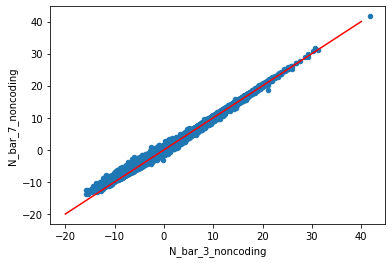

In [16]:
import matplotlib.pyplot as plt 

chen_mchale_zscores_features.plot.scatter(x='N_bar_3_noncoding', y='N_bar_7_noncoding')
plt.plot([-20, 40], [-20, 40], 'red')

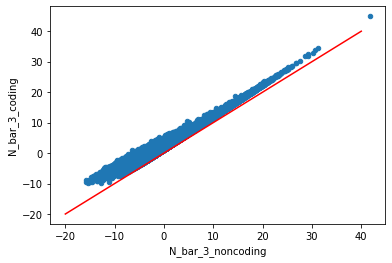

In [17]:
chen_mchale_zscores_features.plot.scatter(x='N_bar_3_noncoding', y='N_bar_3_coding')
plt.plot([-20, 40], [-20, 40], 'red')

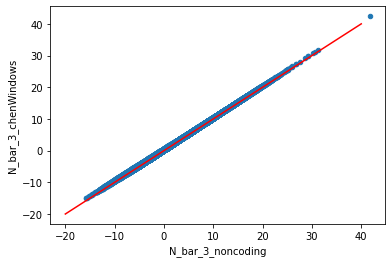

In [18]:
chen_mchale_zscores_features.plot.scatter(x='N_bar_3_noncoding', y='N_bar_3_chenWindows')
plt.plot([-20, 40], [-20, 40], 'red')

## How correlated are the Chen zscores with my zscores? 

In [19]:
chen_mchale_zscores_features['negative new chen zscore'] = -chen_mchale_zscores_features['new chen zscore']

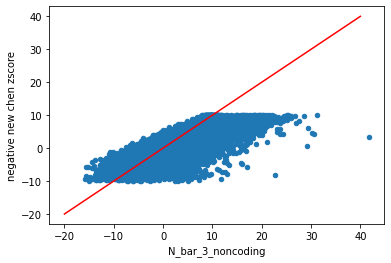

In [20]:
chen_mchale_zscores_features.plot.scatter(x='N_bar_3_noncoding', y='negative new chen zscore')
plt.plot([-20, 40], [-20, 40], 'red')

## Stratify windows by whether they overlap exons or not

In [21]:
def filter_df(
    feature_to_stratify_by,
    window_overlaps_stratify_feature
): 
    df = chen_mchale_zscores_features
    df = df[
        (df[feature_to_stratify_by] == window_overlaps_stratify_feature) 
    ]
    return df


In [22]:
chen_mchale_zscores_features_noncoding = filter_df(
    feature_to_stratify_by = 'window overlaps merged_exon',
    window_overlaps_stratify_feature = False,
)
chen_mchale_zscores_features_coding = filter_df(
    feature_to_stratify_by = 'window overlaps merged_exon',
    window_overlaps_stratify_feature = True,
)

## Windows with extreme values of McHale's N_bar_X_Y are significantly more likely to overlap an enhancer than windows with similarly extreme values of Chen's zscore

In [44]:
def compute_fraction_of_windows_that_overlap_enhancer(df): 
    fraction_of_windows_that_overlap_enhancer = np.mean(df['window overlaps enhancer'])
    return fraction_of_windows_that_overlap_enhancer

import warnings

def compute_array_of_quantiles():
    array_of_quantiles = [0.00, 0.002, 0.005, 0.01, 0.02, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99, 0.995, 0.998, 1.00]
#     array_of_quantiles = [0.00, 0.02, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.98, 1.00]
#     array_of_quantiles = [0.00, 0.10, 0.25, 0.5, 0.75, 0.90, 1.00]
#     array_of_quantiles = [0.00, 0.25, 0.5, 0.75, 1.00]

    starts = array_of_quantiles[:-1]
    ends = array_of_quantiles[1:]
    quantile_labels = [f'{start} - {end}' for start, end in zip(starts, ends)]
    
    return array_of_quantiles, quantile_labels

def label_windows_with_score_quantiles_core(df, score): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")        

        array_of_quantiles, quantile_labels = compute_array_of_quantiles()

        df[f'{score} quantile'], bins = pd.qcut(
            df[score],
            q = array_of_quantiles, 
            labels = quantile_labels, 
            retbins = True,
    #         duplicates='drop'
        )

        return df
    
import seaborn as sns
sns.set(font_scale = 1.5)

import plotly.graph_objects as go
from tqdm import tqdm 
import numpy as np 

def compute_enhancerFraction_vs_quantile(df, score): 
    df = label_windows_with_score_quantiles_core(df, score)

    groups = df.groupby([f'{score} quantile'])
    aggregated = groups.agg({
        'window overlaps enhancer': ['mean'],
        score: ['mean', 'std', 'count']
    })
    
    quantiles = np.array(aggregated.index)
    fraction_overlap_enhancer = np.array(aggregated['window overlaps enhancer']).flatten()
    hover_data = aggregated.to_dict(orient='records')

    return quantiles, fraction_overlap_enhancer, hover_data

def create_text(hover_datum, score):
    mean = hover_datum[(score, 'mean')]
    std = hover_datum[(score, 'std')]
    count = hover_datum[(score, 'count')]
    return (
        f'{score} mean: {mean}<br>'
        f'{score} std: {std}<br>' 
        f'number of windows: {count}<br>' 
    )

def plot_enhancerFraction_vs_quantile(df): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")    
    
        sns.set(font_scale = 1.6)
        fig = go.Figure()

        scores_markers = [
            ('negative new chen zscore', 'square')
        ]
        for kmer_size in [3, 5, 7]: 
            for train_set_label in ['noncoding', 'coding', 'chenWindows']: 
                scores_markers.append((f'N_bar_{kmer_size}_{train_set_label}', 'circle'))
                
        for (score, marker) in tqdm(scores_markers, desc=f'compute_enhancerFraction_vs_quantile'): 
            (
                quantiles, 
                fraction_overlap_enhancer,
                hover_data 
            ) = compute_enhancerFraction_vs_quantile(df, score)
            fig.add_trace(
                go.Scatter(
                    x = quantiles, 
                    y = fraction_overlap_enhancer,
                    mode = 'lines+markers',
                    marker = {
                        'symbol': marker,
                    },
                    name = score,
                    hovertemplate = (
                        '%{text}'
                    ),
                    text = [create_text(hover_datum, score) for hover_datum in hover_data],
                )
            )

        fraction_of_windows_that_overlap_enhancer = compute_fraction_of_windows_that_overlap_enhancer(df)
        fig.add_trace(
            go.Scatter(
                x = quantiles, 
                y = [fraction_of_windows_that_overlap_enhancer]*len(quantiles),
                mode = 'lines',
                name = 'fraction of all windows that overlap an enhancer',
            )
        )

        fig.update_xaxes(
            title = 'quantile of window score',
#             type = "log", 
#             exponentformat = 'power'
        )
        fig.update_yaxes(
            title = 'fraction of Chen windows that overlap a GeneHancer enhancer',
            range=None, 
        )    
        fig.update_layout(
            height = 800, 
            width = 1600,
            font = dict(
                size = 20,
            )        
        )
        fig.update_annotations(font_size=24)
        fig.show()
        
plot_enhancerFraction_vs_quantile(chen_mchale_zscores_features_noncoding)

compute_enhancerFraction_vs_quantile: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.38it/s]


In [45]:
plot_enhancerFraction_vs_quantile(chen_mchale_zscores_features_coding)

compute_enhancerFraction_vs_quantile: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.73it/s]


## Save data to disk

In [47]:
chen_mchale_zscores_features.iloc[:,:-1].to_csv(                                                                                
    f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.kmerSizes.trainSets.enhancer-exon.bed', 
    sep = '\t',
    index = False
)